In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
%load_ext watermark
%watermark -a "author: eljirg" -u -n -t -z

author: eljirg 
last updated: Wed Feb 13 2019 16:37:09 Tokyo Standard Time


# Activation Functions - Keras and Pytorch

A note regarding `activation function` implementation in `keras`

## Why we need activation functions?

Without activation function, Fully connected layers and convolution layers are just linear functions. Having two or more layers of linear functions stack over is pointless since the result can be obtained by using only one linear layer

---
f<sub>1</sub>(x) = a<sub>1</sub>x + b<sub>1</sub>

f<sub>2</sub>(x) = a<sub>2</sub>x + b<sub>2</sub>


---
f<sub>1</sub>(f<sub>2</sub>(x)) = a<sub>1</sub>(a<sub>2</sub>x+b<sub>2</sub>) + b<sub>1</sub>

f<sub>1</sub>(f<sub>2</sub>(x)) = (a<sub>1</sub>a<sub>2</sub>)x + (a<sub>1</sub>b<sub>2</sub> + b<sub>1</sub>)

---

f<sub>1</sub>(f<sub>2</sub>(x)) = a<sub>3</sub>x + b<sub>3</sub>

a<sub>3</sub> = a<sub>1</sub>a<sub>2</sub>,

b<sub>3</sub> = a<sub>1</sub>b<sub>2</sub> + b<sub>1</sub>

---

Activation functions:
- Tanh
- Sigmoid
- Softmax
- ReLU
- Leaky ReLU
- Custom activation (e.g. x2)


## Imports

In [2]:
%matplotlib inline

import os, sys, time, tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.layers import Activation, LeakyReLU
from keras.models import Sequential
from keras import backend as K

# from sklearn import datasets, linear_model
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_boston
# df = pd.DataFrame(load_boston()['data'], columns=load_boston()['feature_names'])
# df['TARGET'] = load_boston()['target']
# df

C:\Users\eljir\Anaconda3\envs\pytorch\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


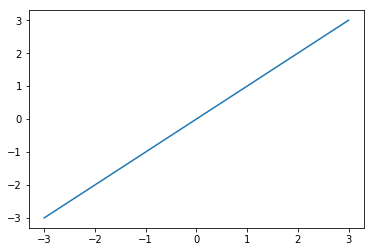

In [3]:
x = np.arange(-3, 3.5, 0.5)
plt.plot(x, x, '-')
plt.show()

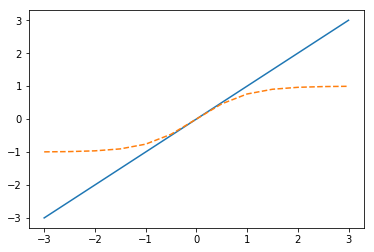

In [4]:
K.clear_session()
model = Sequential([Activation('tanh', input_shape=(1,))])
y_act = model.predict(x)

plt.plot(x, x, '-')
plt.plot(x, y_act, '--')
plt.show()

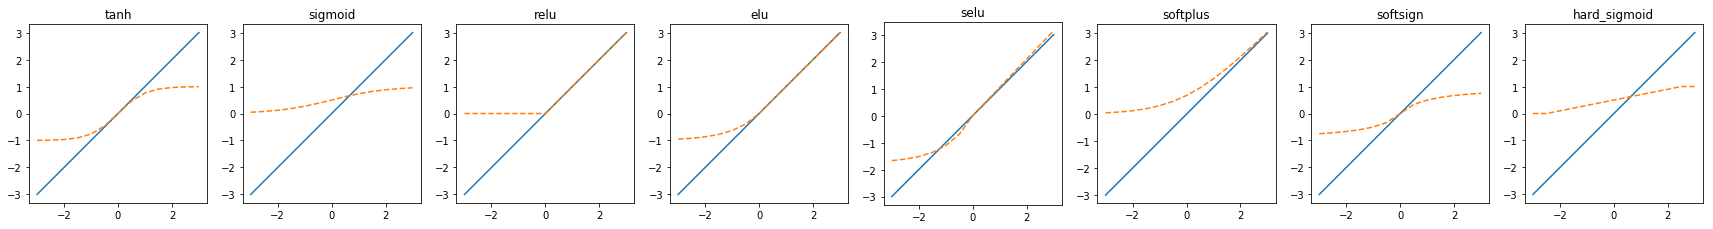

In [5]:
activations = ['tanh', 'sigmoid', 'relu', 'elu', 'selu', 'softplus', 'softsign', 'hard_sigmoid'] #'exponential'
y_acts = []

plt.figure(figsize=(30,5))
for num, activation in enumerate(activations):
    K.clear_session()
    model = Sequential([Activation(activation, input_shape=(1,))])
    y_act = model.predict(x)
    y_acts.append(y_act)
    
    plt.subplot(1,len(activations),num+1,aspect='equal')
    plt.plot(x, x, '-')
    plt.plot(x, y_act, '--')
    plt.title(activation)
    
# plt.tight_layout()
plt.show()

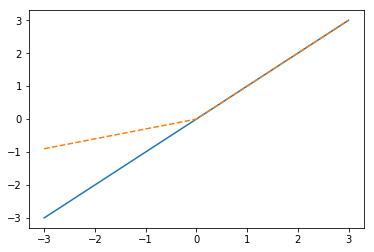

In [6]:
K.clear_session()
model = Sequential([LeakyReLU(0.3, input_shape=(1,))])
y_act = model.predict(x)
y_acts.append(y_act)
activations.append('leakyRelu')

plt.plot(x, x, '-')
plt.plot(x, y_act, '--')
plt.show()

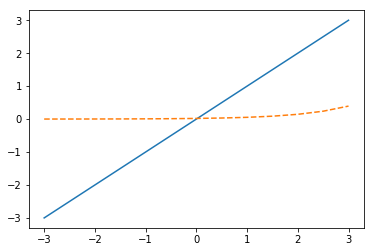

In [7]:
K.clear_session()
plt.figure()
model = Sequential([Activation('softmax', input_shape=(len(x),))])
x_sm = np.expand_dims(x, 0)
y_act = model.predict(x_sm)
y_acts.append(y_act[0])
activations.append('softmax')

plt.plot(x_sm[0], x_sm[0], '-')
plt.plot(x_sm[0], y_act[0], '--')
plt.show()

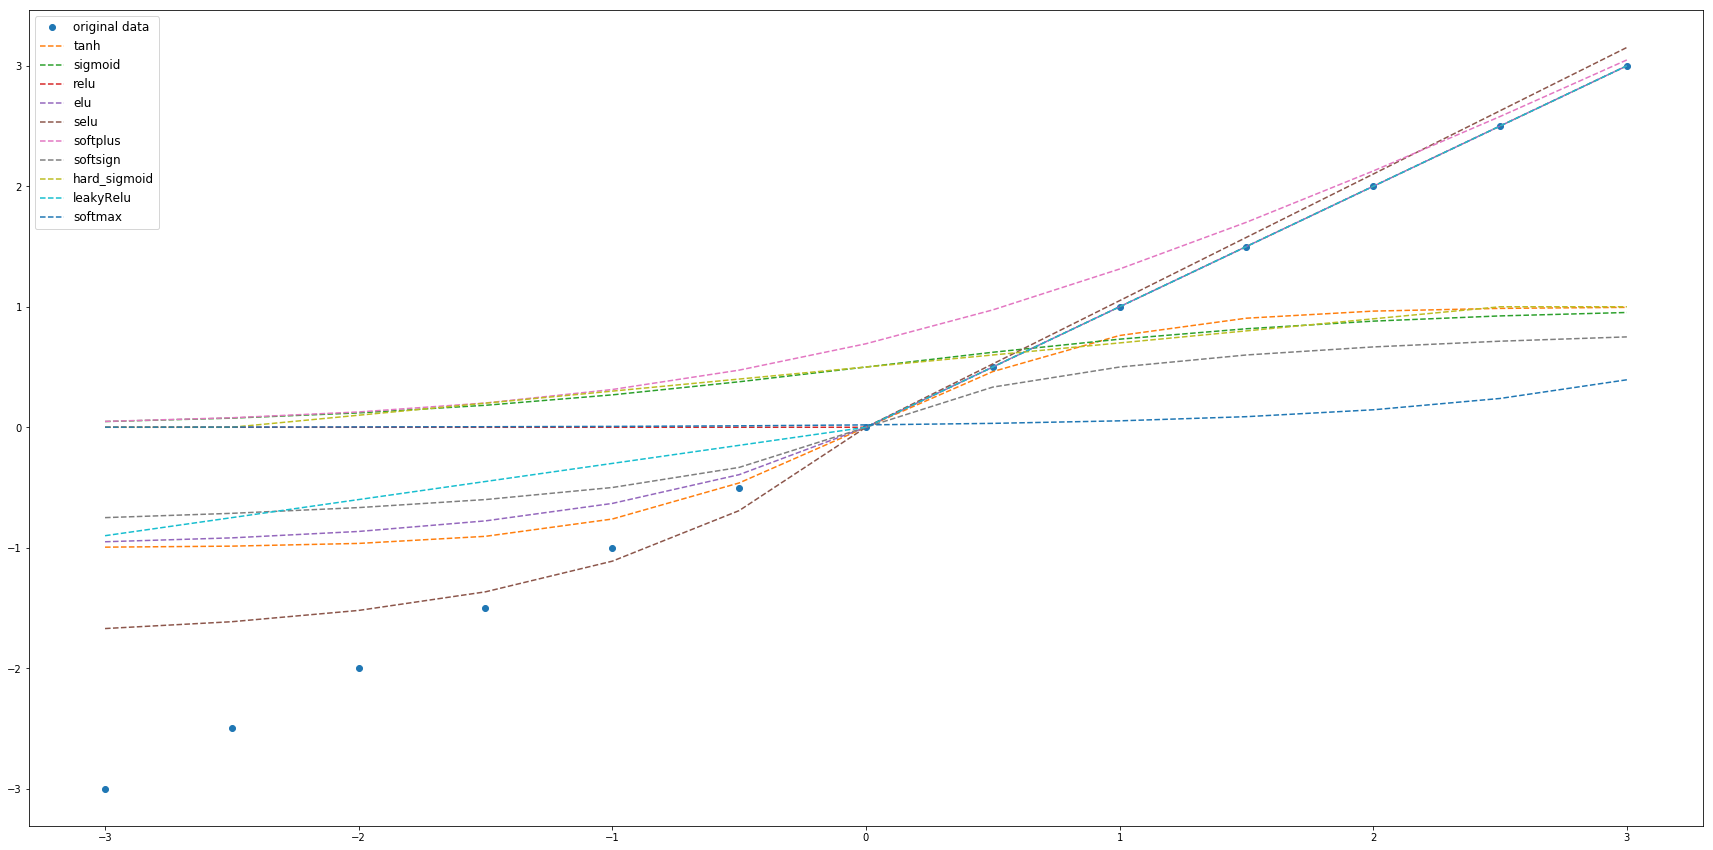

In [8]:
fig, ax = plt.subplots(figsize=(30,15))
ax.plot(x, x, 'o', label='original data')

for y_act, activation in zip(y_acts, activations):
    ax.plot(x, y_act, '--', label=activation)

legend = ax.legend(loc='upper left', fontsize='large')
plt.show()

In [9]:
# Custom activation

In [10]:
%watermark -iv

numpy      1.14.3
matplotlib 2.2.2
seaborn    0.8.1
tqdm       4.28.1
pandas     0.23.0
keras      2.2.4

